In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from shapely import LineString, MultiPoint
import geopandas as gpd 

In [ ]:
def missionPath(interval,width,height,outputName,startCoordinate,rotation,flatMain=0.4,flatCross=0.4):
    # Fungsi Pembentukan lingkaran/ellips 
    def Circle(r,mid,t,b,m):
        if m==0:
            return [mid[0]+b*np.sin(np.radians(t)),mid[1]+r*np.cos(np.radians(t))]
        elif m==1:
            return [mid[0]+r*np.sin(np.radians(t)),mid[1]+b*np.cos(np.radians(t))]
        else:
            return [mid[0]+r*np.sin(np.radians(t)),mid[1]+r*np.cos(np.radians(t))]

    # Pembentukan Jalur utama
    line = np.array([[0,0],[width,0]])
    path = np.array([[i,0] for i in range(0,width+1,interval)])
    segment = np.array([[[i,-height/2],[i,height/2]]for i in range(0,width+1,interval)])

    # Pembentukan jalur belokan
    curvePoint = []
    curve = []
    r = interval/2
    flat = 0.4
    for i in range(len(segment)):
        if i%2==0:
            curvePoint.append([path[i][0],height/2])
        else:
            curvePoint.append([path[i][0],-height/2])
    for i in range(len(curvePoint)-1):
        if i%2==0:
            bf = np.array(curvePoint[i])
            af = np.array(curvePoint[i+1])
            mid = (bf+af)/2
            curve.append([Circle(r,[mid[0],height/2],i,r*flat,1) for i in range(-90,91,30)])
        else:
            bf = np.array(curvePoint[i])
            af = np.array(curvePoint[i+1])
            mid = (bf+af)/2
            
            curve.append([Circle(r,[mid[0],-height/2],i,r*flat,1) for i in range(270,89,-30)])


    sbes = []
    perum = interval/4
    for i in range(0,width+1,interval):
        start = -height/2
        while -height/2<=start<=height/2:
            sbes.append([i,start])
            start+=perum
    curvePoint = np.array(curvePoint)
    curve = np.array(curve)
    sbes = np.array(sbes)
    xmin = 0
    xmax = path[-1][0]
    ymin = -height/2
    ymax = height/2
    silang = []
    for i in range(0,height+1,round(10*interval)):
        print(i)
        if len(segment)%2==0:
            silang.append([[xmax,ymin+i],[xmin,ymin+i]])
        else:
            silang.append([[xmax,ymax-i],[xmin,ymax-i]])

    silang = np.array(silang)
    curveSilang = []
    r = round(10*interval)/2
    flat = 0.4
    for i in range(len(silang)-1):
        if i%2==0 :
            bf = silang[i][1]
            af = silang[i+1][1]
            mid = (bf+af)/2
            print(mid)
            curveSilang.append([Circle(r,mid,i,r*flat,0) for i in range(180,361,30)])
        else:
            bf = silang[i][0]
            af = silang[i+1][0]
            mid = (bf+af)/2
            print(mid)
            curveSilang.append([Circle(r,mid,i,r*flat,0) for i in range(0,181,30)])
    curveSilang = np.array(curveSilang)
    total = []
    for i in range(len(segment)):
        if i%2==0:
            total.append(segment[i][0])
            total.append(segment[i][1])
        else:
            total.append(segment[i][1])
            total.append(segment[i][0])
        if i<len(segment)-1:
            for j in curve[i]:
                total.append(j)
    for i in range(len(silang)):
        if i%2==0:
            total.append(silang[i][0])
            total.append(silang[i][1])
        else:
            total.append(silang[i][1])
            total.append(silang[i][0])
        if i<len(silang)-1:
            if (len(silang)%2==0 and i%2==0) or (len(silang)%2!=0 and i%2!=0):
                for j in curveSilang[i][::-1]:
                    total.append(j)
            else:
                for j in curveSilang[i]:
                    total.append(j)
    utm = np.array(startCoordinate)
    print(utm)
    total= np.array(total)
    rotation = rotation
    def Rotate(mat,sdt):
        rad = np.radians(sdt)
        rotation = np.array([[np.cos(rad),-np.sin(rad)],[np.sin(rad),np.cos(rad)]])
        return (rotation @ mat.reshape(2,1)).flatten()
        # return mat+1
    final = np.array([Rotate(i,rotation) for i in total])+utm
    plt.plot(final[:,0],final[:,1])
    gs = gpd.GeoSeries(LineString(final))
    gs2 = gpd.GeoSeries(MultiPoint(np.array([Rotate(i,rotation) for i in sbes])+utm))
    gdf = gpd.GeoDataFrame(geometry=gs,crs="EPSG:32748")
    gdf.to_file(f"{outputName}.shp")
    gdf = gpd.GeoDataFrame(geometry=gs2,crs="EPSG:32748")
    gdf.to_file(f"{outputName}_point.shp")

0
1500
3000
[   0. -750.]
[4950.  750.]
[ 799578.31 9147572.53]


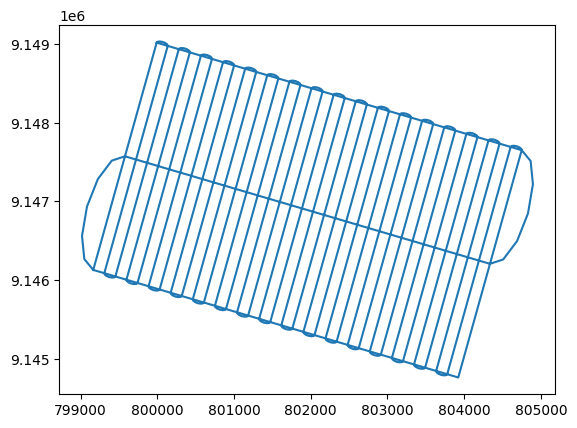

In [96]:
missionPath(150,5000,3000,"no_1",[799578.31,9147572.53],-16)

0
1500
3000
[   0. -750.]
[4950.  750.]
[ 799578.31 9147572.53]


DriverIOError: Failed to create file data\no_2.shp: No such file or directory

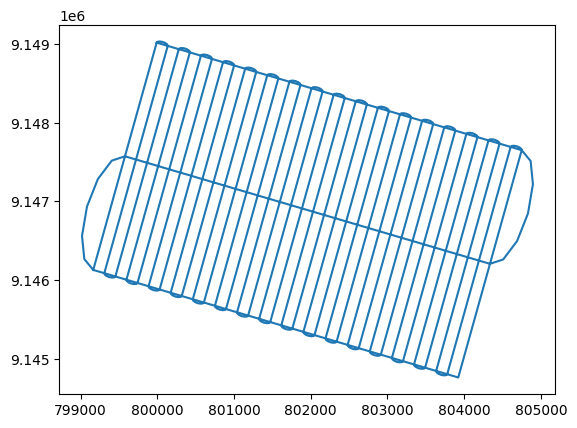

In [ ]:
missionPath(150,5000,3000,"data/no_2",[799578.31,9147572.53],-16)